<a href="https://colab.research.google.com/github/sajiaakhter/mec-mini-projects/blob/master/regression_11_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()


In [4]:
print(boston.keys())
boston.data.shape
# Print column names
print(boston.feature_names)
# Print description of Boston housing data set
#print(boston.DESCR)

#Now let's explore the data set itself.
bos = pd.DataFrame(boston.data)
bos.head()

#There are no column names in the DataFrame. Let's add those.
bos.columns = boston.feature_names
bos.head()
#Now we have a pandas DataFrame called bos containing all the data we want to use to predict Boston Housing prices. 
#Let's create a variable called PRICE which will contain the prices. This information is contained in the target data.
print(boston.target.shape)
bos['PRICE'] = boston.target
bos.head()
bos.describe()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506,)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0.5, 1.0, 'Relationship between CRIM and Price')

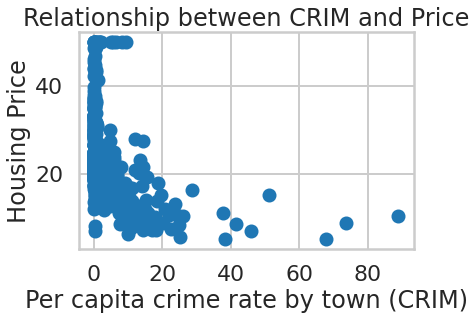

In [5]:
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

#Part 2 Checkup Exercise Set I
Looks like it is a linear relationship. They are negatively correlated. housing price is very low where crime rate is very high and vice versa.



Text(0.5, 1.0, 'Relationship between RM and Price')

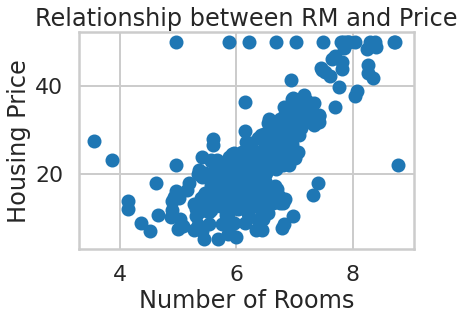

In [6]:
#Part 2 Checkup Exercise Set I
#Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. 
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Number of Rooms")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")


There is a linear relationship between room numbers and price. They are positively correlated. For more #rooms, housing price increases.
 

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

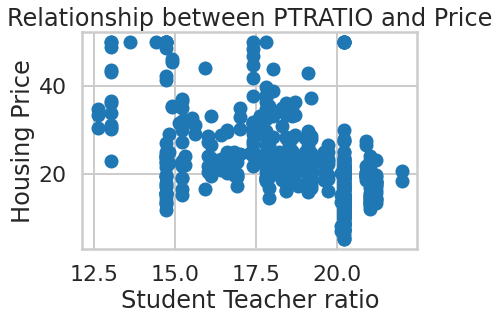

In [7]:
plt.scatter(bos.PTRATIO,bos.PRICE)
plt.xlabel('Student Teacher ratio')
plt.ylabel('Housing Price')
plt.title('Relationship between PTRATIO and Price')

In general, if student teacher ration increases, housing price dicreases but it doesn't look strongly correlated. For same student teacher ratio, we see a big range of housing prices.

Text(0.5, 1.0, 'Relationship between TAX and Price')

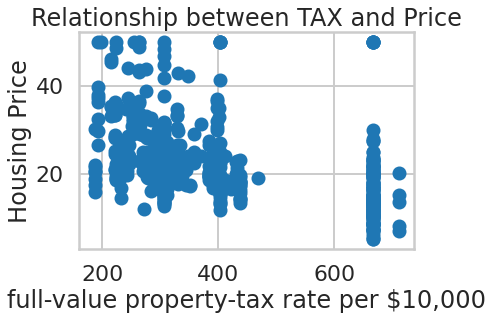

In [8]:
plt.scatter(bos.TAX,bos.PRICE)
plt.xlabel('full-value property-tax rate per $10,000')
plt.ylabel('Housing Price')
plt.title('Relationship between TAX and Price')

In general, if property tax increases, housing price dicreases but it doesn't look strongly correlated. For same property tax, housing price varies.

Text(0.5, 1.0, 'Relationship between AGE and Price')

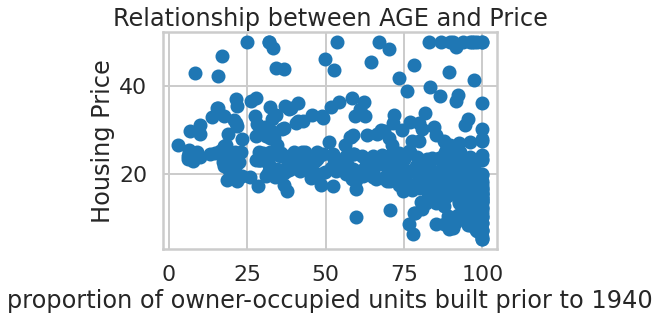

In [9]:
#print(boston.DESCR)
plt.scatter(bos.AGE,bos.PRICE)
plt.xlabel('proportion of owner-occupied units built prior to 1940')
plt.ylabel('Housing Price')
plt.title('Relationship between AGE and Price')

It looks like if the proportion is close to 100 then the housing price has negative impact.



Text(0.5, 1.0, 'Relationship between NOX and Price')

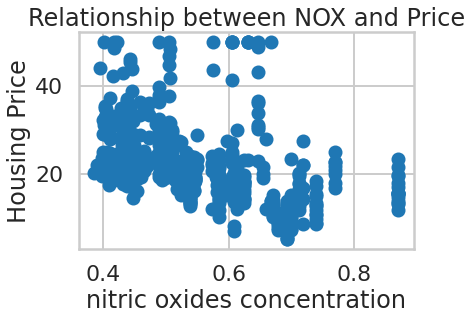

In [10]:
#print(boston.DESCR)
plt.scatter(bos.NOX,bos.PRICE)
plt.xlabel('nitric oxides concentration')
plt.ylabel('Housing Price')
plt.title('Relationship between NOX and Price')

They are negatively related but not strongly correlated. If concentration more than 0.6, housing price decreases. 

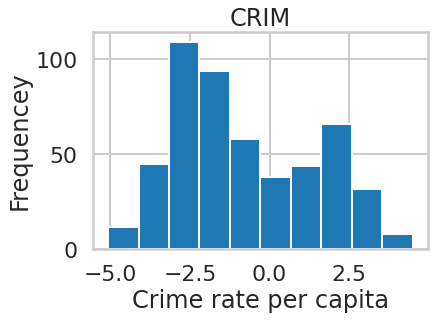

In [11]:
plt.hist(np.log(bos.CRIM))
#plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()


Exercise: In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

- There are so many points with zero and less than 1 (50% of the data). To consider these numbers,  we did log transformation. compresses the range of large numbers and expands the range of small numbers 
- The histogram of this variable is skewed. 

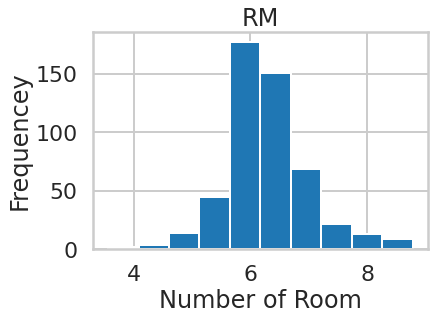

In [12]:
plt.hist(bos.RM)
plt.title("RM")
plt.xlabel("Number of Room")
plt.ylabel("Frequencey")
plt.show()

It is normally distributed.


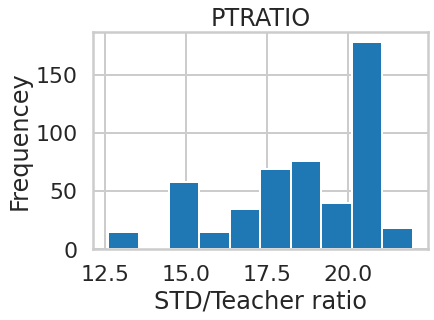

In [13]:
plt.hist(bos.PTRATIO)
plt.title("PTRATIO")
plt.xlabel("STD/Teacher ratio")
plt.ylabel("Frequencey")
plt.show()

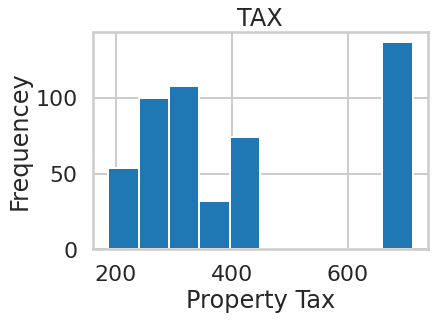

In [14]:
plt.hist(bos.TAX)
plt.title("TAX")
plt.xlabel("Property Tax")
plt.ylabel("Frequencey")
plt.show()

Looks like 6.5 is an outlier?

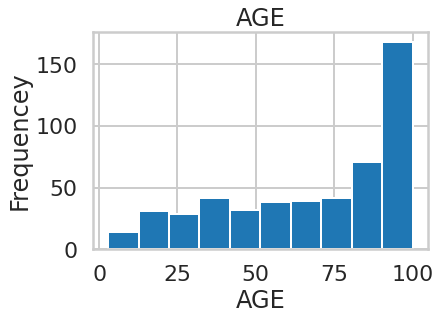

In [5]:
plt.hist(bos.AGE)
plt.title("AGE")
plt.xlabel("AGE")
plt.ylabel("Frequencey")
plt.show()

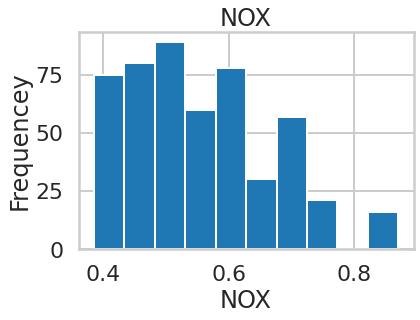

In [63]:
plt.hist(bos.NOX)
plt.title("NOX")
plt.xlabel("NOX")
plt.ylabel("Frequencey")
plt.show()

In [6]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

m = ols('PRICE ~ RM',bos).fit()
print(m.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           2.49e-74
Time:                        05:37:43   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

Text(0.5, 1.0, 'predicted vs. original price')

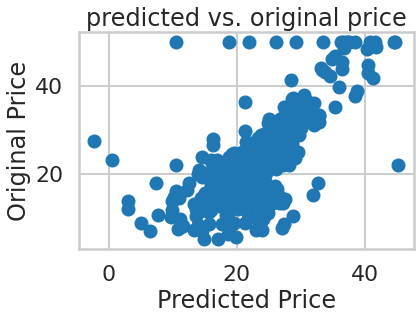

In [17]:
#Exercise: Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) 
#and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.
plt.scatter(m.fittedvalues, bos.PRICE)
plt.xlabel('Predicted Price')
plt.ylabel('Original Price')
plt.title('predicted vs. original price')

It should be a straight line, if the model is good. there are several points where predicted prices are very low but original prices are nuch high and vice versa. So we need to include other features to the model.

In [12]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm.fit(X, bos.PRICE)
print(lm.coef_,lm.intercept_,lm.score)

#without intercept
lm_wo_intercept = LinearRegression(fit_intercept = False)
lm_wo_intercept.fit(X, bos.PRICE)
print(lm_wo_intercept.coef_,lm_wo_intercept.intercept_)


[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01] 36.45948838508978 <bound method RegressorMixin.score of LinearRegression()>
[-9.28965170e-02  4.87149552e-02 -4.05997958e-03  2.85399882e+00
 -2.86843637e+00  5.92814778e+00 -7.26933458e-03 -9.68514157e-01
  1.71151128e-01 -9.39621540e-03 -3.92190926e-01  1.49056102e-02
 -4.16304471e-01] 0.0


How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not?

- For this problem, since land has price, there will be always a minimum price for housing regardless of the coefficient values. So intercept cannot be zero.


**Exercise: One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.**


**Exercise: True or false. To use linear regression, y must be normally distributed. Explain your answer.**



Text(0.5, 1.0, 'histogram of all the predicted prices')

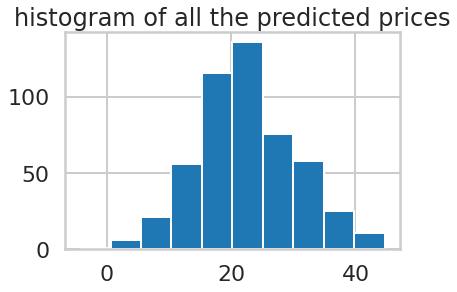

In [8]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]
#Plot a histogram of all the predicted prices
predictedY = lm.predict(X)
plt.hist(predictedY)
plt.title('histogram of all the predicted prices')

**Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?**

- It looks like the predicted prices are normal distribution. 

Text(0.5, 1.0, 'predicted vs. original price')

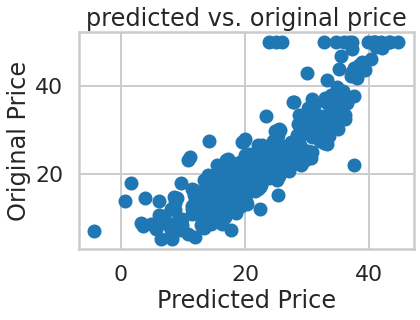

In [9]:
plt.scatter(predictedY, bos.PRICE)
plt.xlabel('Predicted Price')
plt.ylabel('Original Price')
plt.title('predicted vs. original price')


**We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?**

Looks like sklearn.linear_model predcits better price than statsmodels ols function. However, OLS Regression Results shows the confidence interval and P value for every coefficients.  


In [14]:
#Exercise: Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) 
# and interpret the intercept and the coefficients.

m_ptratio = ols('PRICE ~ PTRATIO',bos).fit()
print(m_ptratio.summary())


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           1.61e-34
Time:                        06:34:35   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

Looks like PTRATIO is statistically significant predictor of housing prices (zero P value). Also, the coefficient of PTRATIO -2.1572 means that every one unit increment of PTRATIO housing price will decrease \$2157.2. The confidence interval gives us a range of plausible values for this average change, about -\$2477 to -\$1837, not a big range. 

The intercept, 62.3446 gives the housing price if all other variables Xi are zero. 

In [25]:
#Exercise: Calculate (or extract) the R^2 value. What does it tell you?
ess = np.sum((m_ptratio.fittedvalues - np.mean(bos.PRICE))**2)
rss = np.sum((bos.PRICE - m_ptratio.fittedvalues) ** 2)
rsquared = ess/(ess+rss)
print(rsquared)
print(m_ptratio.rsquared)


0.257847318009223
0.257847318009223


R squared is 0.25. That means the model explains only about 25% of the variability of the response data around its mean. So it is not a good model to fit the data. 

In [23]:

#Exercise: Compute the F-statistic. What does it tell you?
print(m_ptratio.f_pvalue, m_ptratio.fvalue, m_ptratio.tvalues)


1.6095094784729786e-34 175.1055428756955 Intercept    20.581406
PTRATIO     -13.232745
dtype: float64



**Exercise: Take a close look at the F-statistic and the t-statistic for the regression coefficient. 
What relationship do you notice? Note that this relationship only applies in simple linear regression models.**

Looks like P value of F test is close to zero so we can reject the null hypothesis and say that PTRATIO is stastically significant.

In [26]:
#Part 3 Checkup Exercise Set V
#Fit a linear regression model using three independent variables
m_3 = ols('PRICE ~ CRIM + RM+ PTRATIO',bos).fit()
print(m_3.summary())

#Exercise: Compute or extract the F-statistic. What does it tell you about the model?
print(m_3.f_pvalue, m_3.fvalue)

#Exercise: Compute or extract the R^2 statistic. What does it tell you about the model?
print(m_3.rsquared)


                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Fri, 08 Apr 2022   Prob (F-statistic):           6.15e-98
Time:                        07:33:09   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

- the  P value of F test is close to zero so we can reject the null hypothesis and say that the combination of the variables CRIM, RM and PTRATIO are stastically significant. However, it doesn't tell us which how significant of individual variables.

- The rsquared is better than the previous model. About 59% of the response data are around the mean. 


**Exercise: Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.**

All these three variables are statistically significant since the P values are zero.
- for every one unit increment of crime rate, the housing price decreases \$7380.4
- for every one unit increment of room number, the housing price increses \$2050
- for every one unit of increment student teacher ratio, the housing price decreases \$1069.5

In [28]:
#Exercise: Find another variable (or two) to add to the model we built in Part 3. 
#Compute the F-test comparing the two models as well as the AIC. Which model is better?
m_5 = ols('PRICE ~ CRIM + RM+ PTRATIO + TAX + AGE',bos).fit()
print(m_5.summary())

rss3 = np.sum((bos.PRICE - m_3.fittedvalues) ** 2)
rss5 = np.sum((bos.PRICE - m_5.fittedvalues) ** 2)
df3 = 506-3-1
df5 = 506-5-1
ftest = ((rss3-rss5)/(df3-df5))/(rss5/df5)
print(ftest)

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     158.0
Date:                Fri, 08 Apr 2022   Prob (F-statistic):          1.74e-100
Time:                        08:12:47   Log-Likelihood:                -1600.4
No. Observations:                 506   AIC:                             3213.
Df Residuals:                     500   BIC:                             3238.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.7363      4.006     -0.184      0.8

Comparing AIC, the model with 5 variables is slightly better.


Text(0, 0.5, 'Residuals')

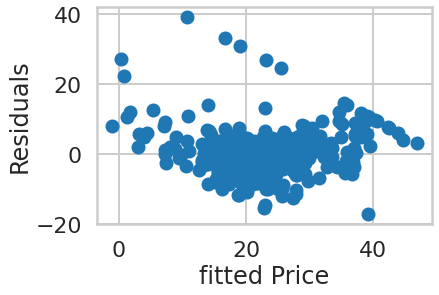

In [31]:
#Exercise: Construct a fitted values versus residuals plot. What does the plot tell you? 
#Are there any violations of the model assumptions?

plt.scatter(m_3.fittedvalues, m_3.resid)
plt.xlabel('fitted Price')
plt.ylabel('Residuals')


For lower housing price, there are more error in model prediction 

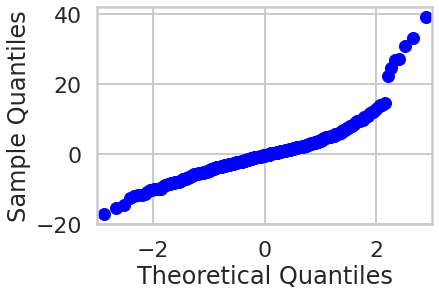

In [32]:
#Exercise: Construct a quantile plot of the residuals. What does the plot tell you?
sm.qqplot(m_3.resid)
plt.show()

**Exercise: What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?**


**Exercise: Identify any outliers (if any) in your model and write a story describing what these outliers might represent.**




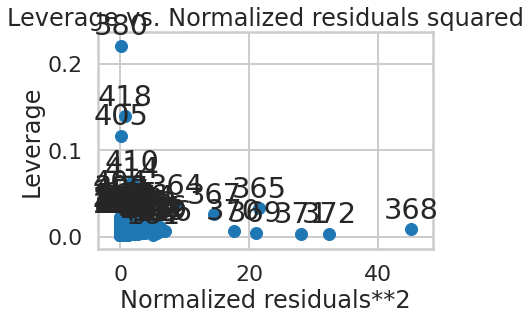

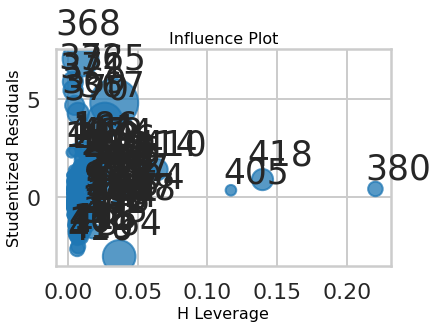

In [40]:
#Exercise: Construct a leverage plot and identify high leverage points in the model. 

sm.graphics.plot_leverage_resid2(m_3)
plt.show()
influence_plot(m_3)
plt.show()


**Write a story explaining possible reasons for the high leverage points.**



**Remove the outliers and high leverage points from your model and run the regression again. How do the results change?**